<a href="https://colab.research.google.com/github/SoumyajitPaul-git/DiabetesPrediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install scikit-learn version 1.5.1
# !pip install scikit-learn==1.5.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Connecting Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# checking scikit-learn version
import sklearn
print(sklearn.__version__)

1.5.1


## Importing Dependencies

In [ ]:
#Installation of required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
# import sklearn version 1.5.1
import sklearn
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

1.5.1
1.25.2
2.0.3


## EDA

In [ ]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Diabetes_Prediction/Copy of diabetes.csv")

In [ ]:
# The first 5 observation units of the data set were accessed.
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape, df.columns

((768, 9),
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'))

In [ ]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [ ]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

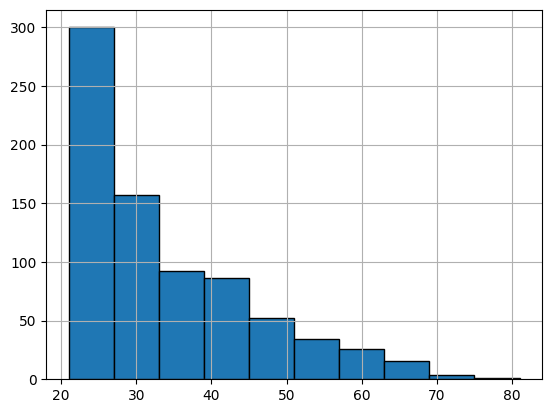

In [ ]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [ ]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

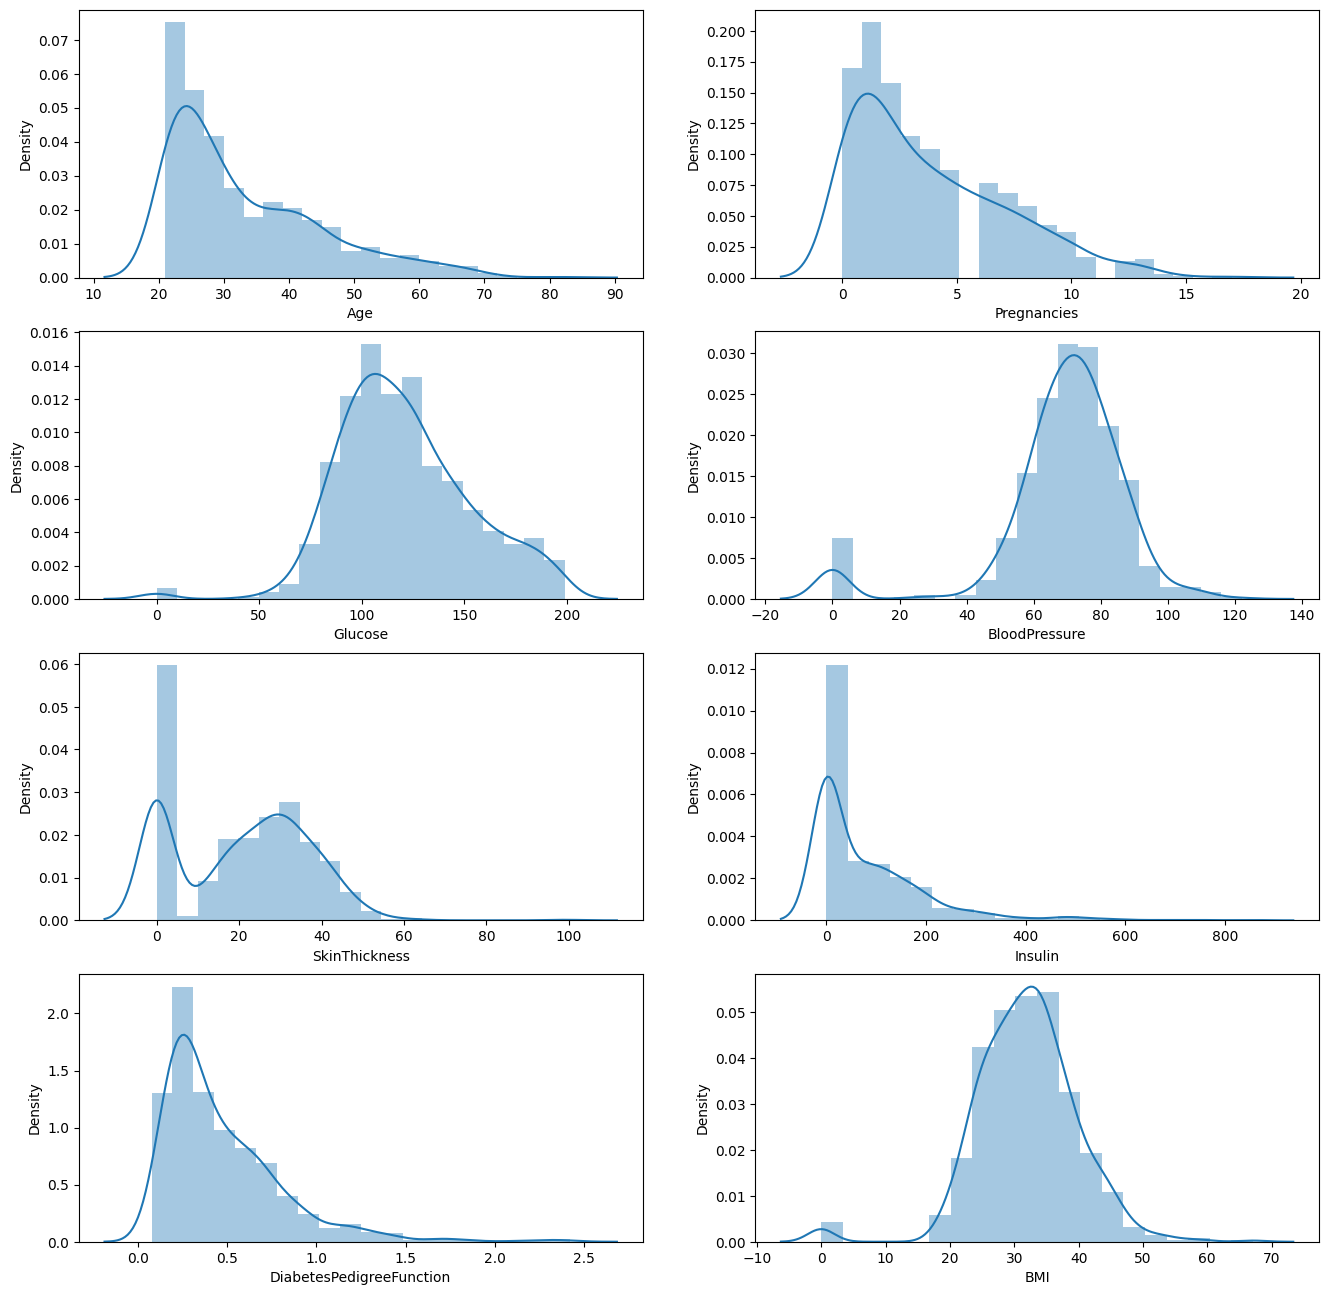

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

In [ ]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [ ]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [ ]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


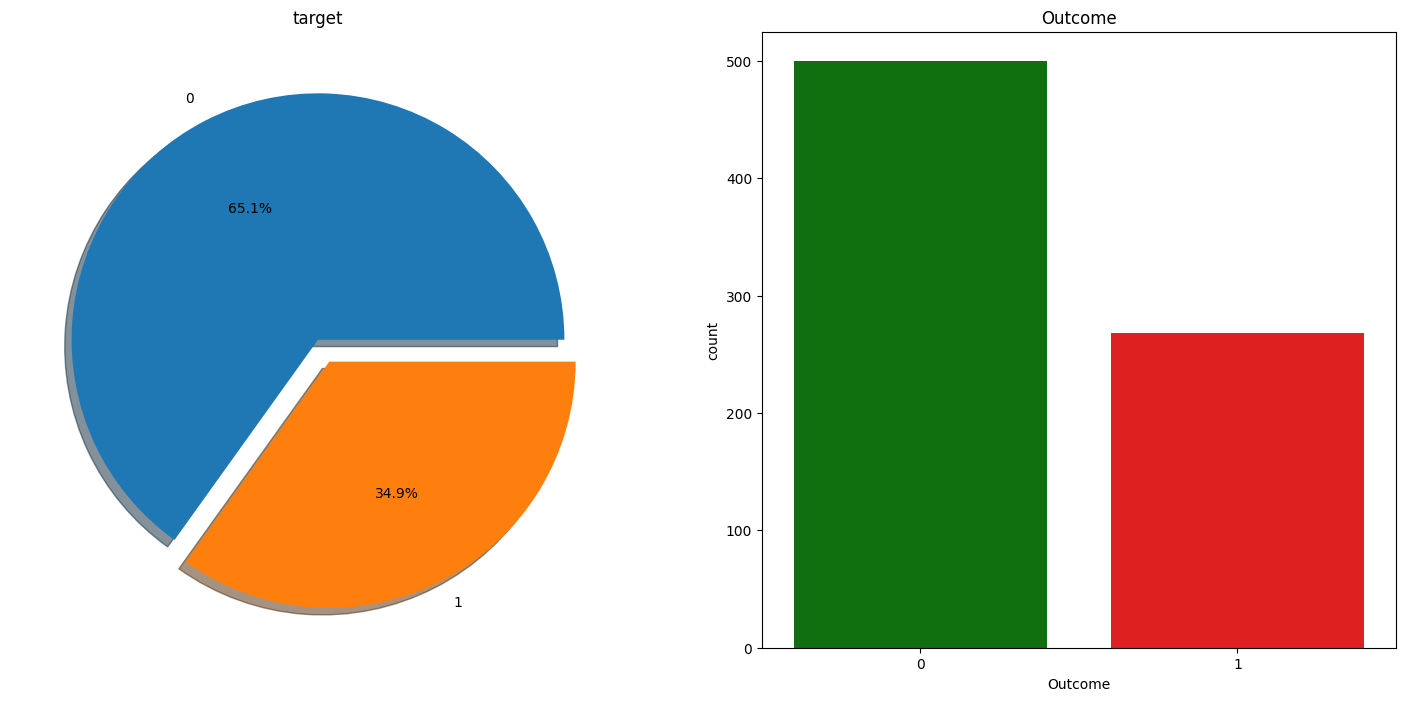

In [ ]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x = 'Outcome',data = df , palette = ['g','r'])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables.
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases.
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


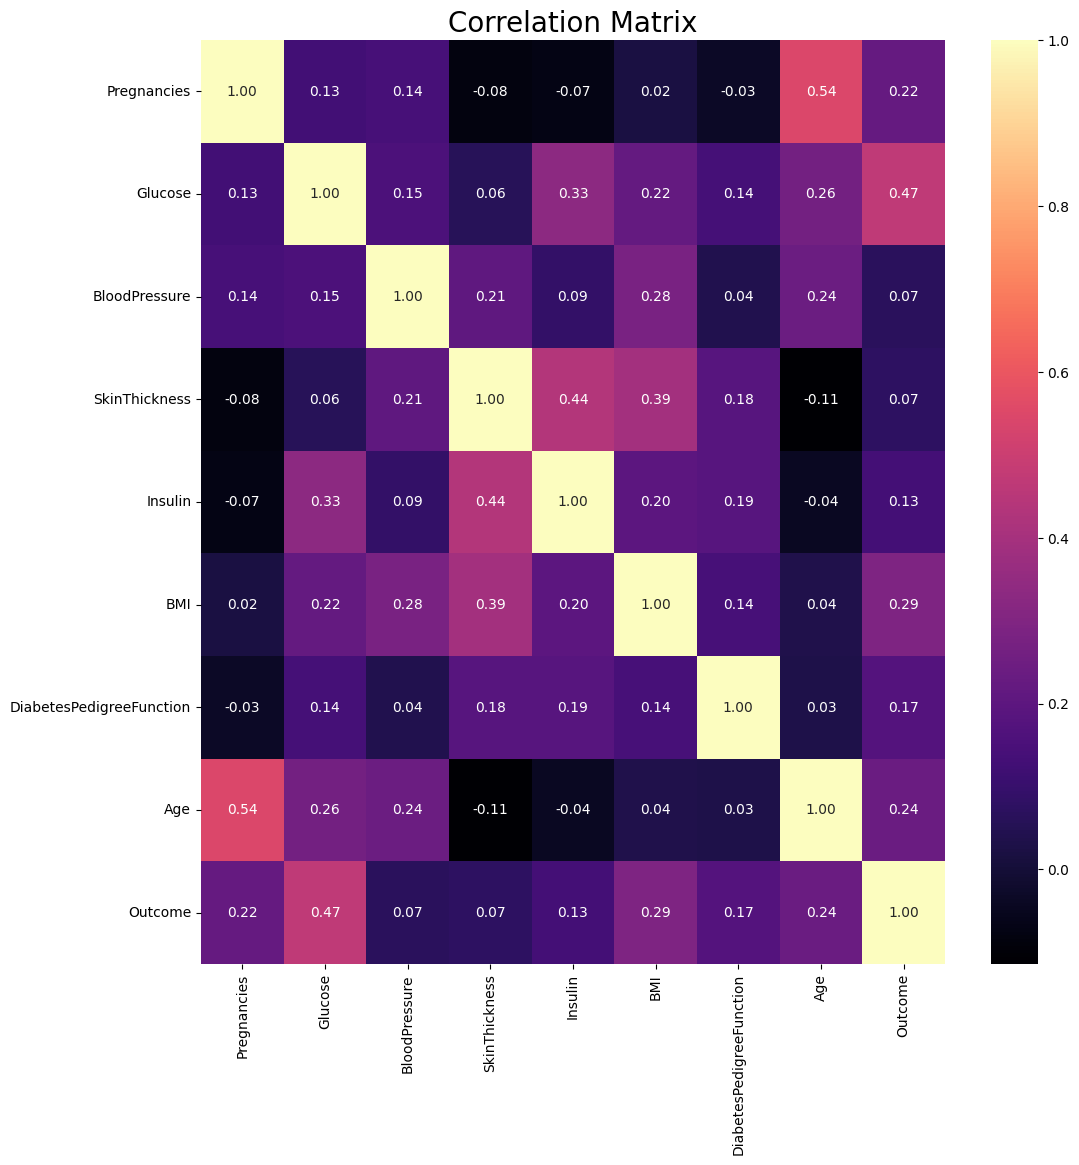

In [ ]:

""" Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
Pregnancies	1.000000	0.129459	0.141282	-0.081672	-0.073535	0.017683	-0.033523	0.544341	0.221898
Glucose	0.129459	1.000000	0.152590	0.057328	0.331357	0.221071	0.137337	0.263514	0.466581
BloodPressure	0.141282	0.152590	1.000000	0.207371	0.088933	0.281805	0.041265	0.239528	0.065068
SkinThickness	-0.081672	0.057328	0.207371	1.000000	0.436783	0.392573	0.183928	-0.113970	0.074752
Insulin	-0.073535	0.331357	0.088933	0.436783	1.000000	0.197859	0.185071	-0.042163	0.130548
BMI	0.017683	0.221071	0.281805	0.392573	0.197859	1.000000	0.140647	0.036242	0.292695
DiabetesPedigreeFunction	-0.033523	0.137337	0.041265	0.183928	0.185071	0.140647	1.000000	0.033561	0.173844
Age	0.544341	0.263514	0.239528	-0.113970	-0.042163	0.036242	0.033561	1.000000	0.238356
Outcome	0.221898	0.466581	0.065068	0.074752	0.130548	0.292695	0.173844	0.238356	1.000000 """
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [12,12])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Data Preprocessing

 Missing Observation Analysis¶
We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [ ]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

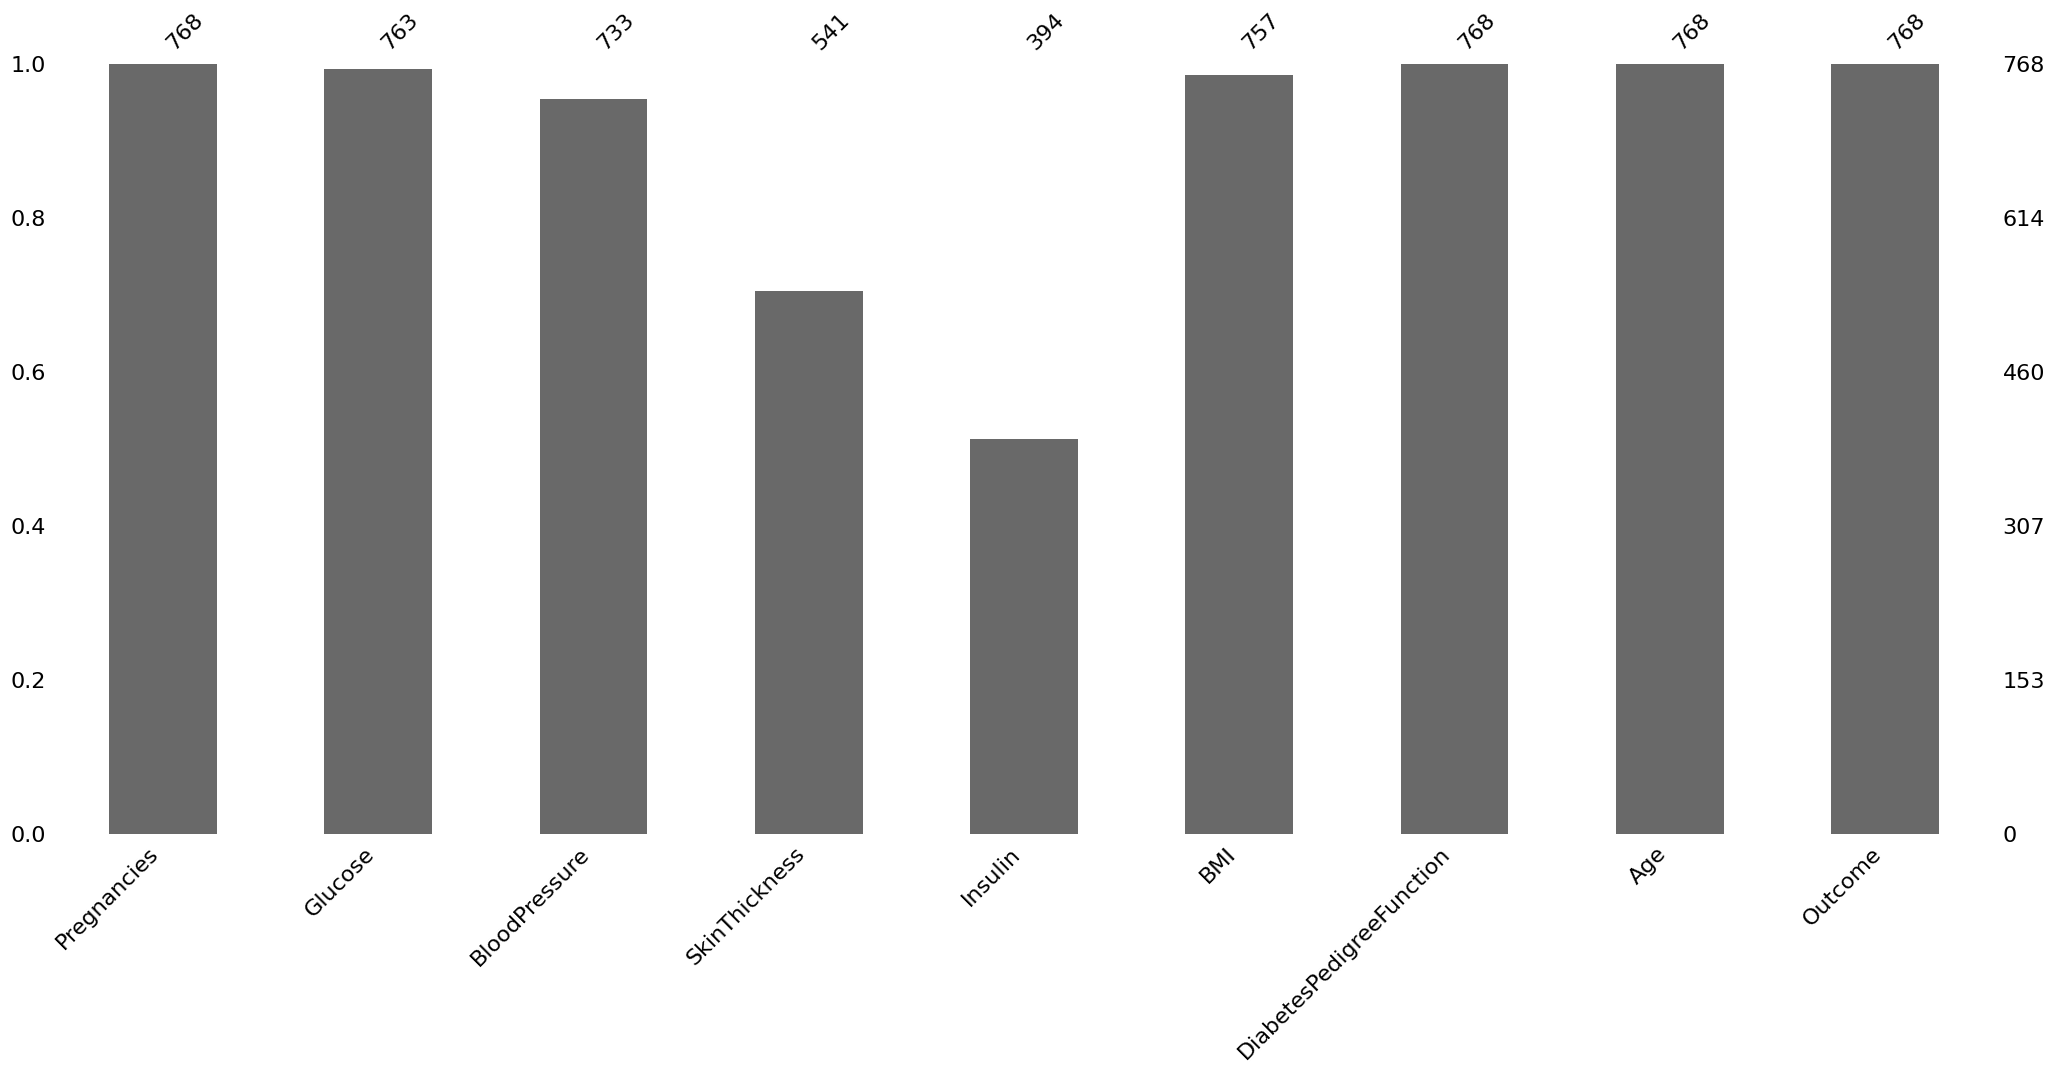

In [ ]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting
import missingno as msno
msno.bar(df);

In [ ]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualization

In [ ]:
# correlation heatmap
# sns.heatmap(df.corr(), annot=True)

In [ ]:
# plotting scatter matrix
# sns.pairplot( df )

In [ ]:
# plotting scatter matrix
# sns.pairplot( df, hue="Outcome" )

## Splitting traning and test data

In [ ]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
# printing the splitted data

print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7    150.0           78.0           29.0    126.0  35.2   
118            4     97.0           60.0           23.0    102.5  28.2   
247            0    165.0           90.0           33.0    680.0  52.3   
157            1    109.0           56.0           21.0    135.0  25.2   
468            8    120.0           74.5           32.0    169.5  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
192            7    159.0           66.0           32.0    169.5  30.4   
629            4     94.0           65.0           22.0    102.5  24.7   
559           11     85.0           74.0           27.0    102.5  30.1   
684            5    136.0           82.0           27.0    102.5  30.1   

     DiabetesPedigreeFunction  Age  
603                     0.692   54  
118                     0.443   22  


## Feature Scaling

In [ ]:
import pickle
scaler = StandardScaler()
scaler.fit(x_train)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled, x_test_scaled

(array([[ 0.90832902,  0.93496373,  0.44720847, ...,  0.37092722,
          0.67740401,  1.69955804],
        [ 0.03644676, -0.81604857, -1.05121444, ..., -0.62991727,
         -0.07049698, -0.96569189],
        [-1.12606292,  1.43053324,  1.44615707, ...,  2.81584731,
         -0.11855487, -0.88240283],
        ...,
        [ 0.03644676, -0.91516247, -0.63498586, ..., -1.13033951,
         -0.95656442, -1.04898095],
        [ 2.0708387 , -1.21250418,  0.1142256 , ..., -0.35825948,
         -0.50001442,  0.11706589],
        [ 0.32707418,  0.47243218,  0.78019133, ..., -0.35825948,
          0.52121586,  2.94889395]]),
 array([[-0.8354355 ,  2.55382415,  0.28071703, ...,  1.47185615,
          2.78594417, -0.96569189],
        [-0.54480808, -0.48566889,  0.1142256 , ...,  0.14216276,
         -0.1876381 , -0.88240283],
        [ 0.03644676, -1.50984589, -0.88472301, ...,  0.19935388,
         -0.22668514, -0.71582471],
        ...,
        [ 0.03644676,  0.67065998,  1.1131742 , ...,  

In [ ]:
x_test_scaled

array([[-0.8354355 ,  2.55382415,  0.28071703, ...,  1.47185615,
         2.78594417, -0.96569189],
       [-0.54480808, -0.48566889,  0.1142256 , ...,  0.14216276,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.50984589, -0.88472301, ...,  0.19935388,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.67065998,  1.1131742 , ...,  1.62913171,
         0.53623395, -0.96569189],
       [-0.25418066, -0.18832718,  0.1142256 , ..., -0.90157505,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.48566889, -0.05226584, ..., -0.25817503,
         1.06487079, -0.79911377]])

In [ ]:
# import pickle
# from sklearn.preprocessing import StandardScaler

# # Assuming x_train is your training data array
# x_train = [
#     [1, 85, 66, 29, 0, 26.6, 0.351, 31],
#     [8, 183, 64, 0, 0, 23.3, 0.672, 32],
#     [1, 89, 66, 23, 94, 28.1, 0.167, 21],
#     # ... more training data
# ]

# scaler = StandardScaler()
# scaler.fit(x_train)

# # Save the scaler to a file
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

# # Transform x_train for checking
# x_train_scaled = scaler.transform(x_train)
# print(x_train_scaled)


In [ ]:
# # transforming a data with pickle model
# scaler = pickle.load(open('scaler.pkl', 'rb'))
# x_train_scaled = scaler.transform(x_train)
# x_train_scaled

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
# predict for train values

y_pred_lr = lr.predict(x_train_scaled)
y_pred_lr

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [ ]:
ac_lr=accuracy_score(y_pred_lr,y_train)
re_lr=recall_score(y_pred_lr,y_train)
pr_lr=precision_score(y_pred_lr,y_train)
f1_lr=f1_score(y_pred_lr,y_train)

print("Accuracy : ",ac_lr)
print("Recall Score : ",re_lr)
print("Precision Score : ",pr_lr)
print("F1 Score : ",f1_lr)

Accuracy :  0.7687296416938111
Recall Score :  0.7182320441988951
Precision Score :  0.5882352941176471
F1 Score :  0.6467661691542289


In [ ]:
# classification report
print(classification_report(y_pred_lr,y_train))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       433
           1       0.59      0.72      0.65       181

    accuracy                           0.77       614
   macro avg       0.73      0.75      0.74       614
weighted avg       0.79      0.77      0.77       614



In [ ]:
# confusion matrix
cm_lr = confusion_matrix(y_pred_lr,y_train)
cm_lr

array([[342,  91],
       [ 51, 130]])

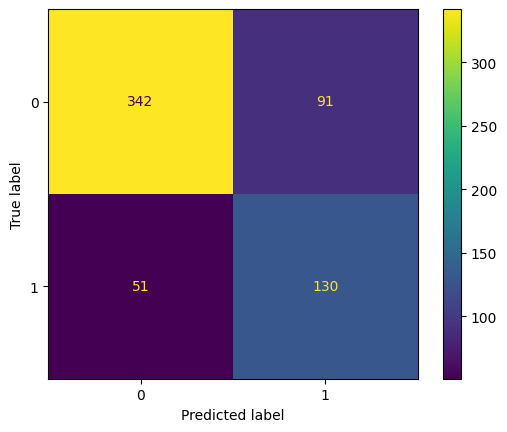

In [ ]:
# plotting confusion matrix
cmd = ConfusionMatrixDisplay(cm_lr)
cmd.plot()

In [ ]:
# predict for test values
y_pred_lr = lr.predict(x_test_scaled)
y_pred_lr

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
ac_lr=accuracy_score(y_pred_lr,y_test)
re_lr=recall_score(y_pred_lr,y_test)
pr_lr=precision_score(y_pred_lr,y_test)
f1_lr=f1_score(y_pred_lr,y_test)

print("Accuracy : ",ac_lr)
print("Recall Score : ",re_lr)
print("Precision Score : ",pr_lr)
print("F1 Score : ",f1_lr)

Accuracy :  0.7857142857142857
Recall Score :  0.675
Precision Score :  0.574468085106383
F1 Score :  0.6206896551724138


In [ ]:
# confusion matrix
cm_lr = confusion_matrix(y_pred_lr,y_test)
cm_lr

array([[94, 20],
       [13, 27]])

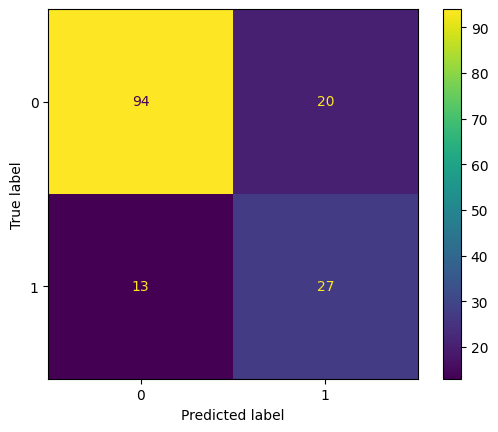

In [ ]:
# plotting confusion matrix
cmd = ConfusionMatrixDisplay(cm_lr)
cmd.plot()

## KNN

In [ ]:
# using knn classifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# predicting training dataset values
y_pred_knn = knn.predict(x_train_scaled)
y_pred_knn.shape

(614,)

In [ ]:
# # checking accuracy, precision, f1, recall
ac_knn=accuracy_score(y_pred_knn,y_train)
re_knn=recall_score(y_pred_knn,y_train)
pr_knn=precision_score(y_pred_knn,y_train)
f1_knn=f1_score(y_pred_knn,y_train)

print("Accuracy : ",ac_knn)
print("Recall Score : ",re_knn)
print("Precision Score : ",pr_knn)
print("F1 Score : ",f1_knn)

Accuracy :  0.8599348534201955
Recall Score :  0.8229665071770335
Precision Score :  0.7782805429864253
F1 Score :  0.8


In [ ]:
# predict for test data
y_pred_knn = knn.predict(x_test_scaled)
y_pred_knn.shape

(154,)

In [ ]:
# checking accuracy, precision, f1, recall
ac_knn=accuracy_score(y_pred_knn,y_test)
re_knn=recall_score(y_pred_knn,y_test)
pr_knn=precision_score(y_pred_knn,y_test)
f1_knn=f1_score(y_pred_knn,y_test)

print("Accuracy : ",ac_knn)
print("Recall Score : ",re_knn)
print("Precision Score : ",pr_knn)
print("F1 Score : ",f1_knn)

Accuracy :  0.8116883116883117
Recall Score :  0.68
Precision Score :  0.723404255319149
F1 Score :  0.7010309278350515


k = 1: Train accuracy = 1.0000, Test accuracy = 0.8052
k = 2: Train accuracy = 0.8746, Test accuracy = 0.7987
k = 3: Train accuracy = 0.8974, Test accuracy = 0.8052
k = 4: Train accuracy = 0.8730, Test accuracy = 0.8052
k = 5: Train accuracy = 0.8599, Test accuracy = 0.8117
k = 6: Train accuracy = 0.8567, Test accuracy = 0.8182
k = 7: Train accuracy = 0.8583, Test accuracy = 0.8117
k = 8: Train accuracy = 0.8567, Test accuracy = 0.8182
k = 9: Train accuracy = 0.8599, Test accuracy = 0.8312
k = 10: Train accuracy = 0.8518, Test accuracy = 0.8506
k = 11: Train accuracy = 0.8567, Test accuracy = 0.8636
k = 12: Train accuracy = 0.8485, Test accuracy = 0.8701
k = 13: Train accuracy = 0.8502, Test accuracy = 0.8701
k = 14: Train accuracy = 0.8339, Test accuracy = 0.8571
k = 15: Train accuracy = 0.8404, Test accuracy = 0.8571
k = 16: Train accuracy = 0.8322, Test accuracy = 0.8377
k = 17: Train accuracy = 0.8404, Test accuracy = 0.8442
k = 18: Train accuracy = 0.8225, Test accuracy = 0.8312
k

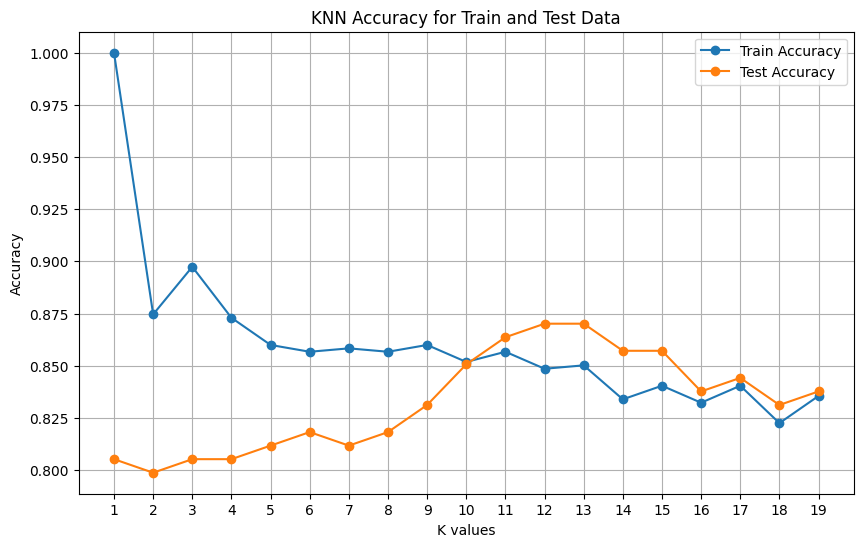

Best K value based on test accuracy: 12


KNeighborsClassifier(n_neighbors=12)

In [ ]:
# using knn classifier

knn_list = []
knn_list2 = []

# Iterate over different values of k from 1 to 19
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)

    # Calculate accuracy and store in lists
    # train_accuracy = knn.score(x_train_scaled, y_train)
    # test_accuracy = knn.score(x_test_scaled, y_test)

    train_accuracy = accuracy_score(y_train, knn.predict(x_train_scaled))
    test_accuracy = accuracy_score(y_test, knn.predict(x_test_scaled))

    knn_list.append([train_accuracy, i])
    knn_list2.append([test_accuracy, i])

    # Print the results for each k
    print(f"k = {i}: Train accuracy = {train_accuracy:.4f}, Test accuracy = {test_accuracy:.4f}")

# Extracting accuracy lists for plotting
accuracy_list1 = [accuracy[0] for accuracy in knn_list]  # Train accuracies
accuracy_list2 = [accuracy[0] for accuracy in knn_list2]  # Test accuracies

print("Train accuracies:", accuracy_list1)
print("Test accuracies:", accuracy_list2)

# Plotting the accuracies
plt.figure(figsize=(10, 6))

plt.plot(range(1, 20), accuracy_list1, marker='o', label='Train Accuracy')
plt.plot(range(1, 20), accuracy_list2, marker='o', label='Test Accuracy')

plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Train and Test Data')
plt.xticks(range(1, 20))
plt.legend()
plt.grid(True)
plt.show()

# Finally, retrain the KNN classifier with the best k (you can choose based on the plot)
best_k = accuracy_list2.index(max(accuracy_list2)) + 1  # +1 because k starts from 1
print(f"Best K value based on test accuracy: {best_k}")

# Retrain KNN with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_scaled, y_train)
# knn_best.score(x_train_scaled, y_train)



In [ ]:
# predicting training dataset values
y_pred_knn = knn_best.predict(x_train_scaled)
y_pred_knn

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
# checking accuracy, precision, f1, recall
ac_knn=accuracy_score(y_pred_knn,y_train)
re_knn=recall_score(y_pred_knn,y_train)
pr_knn=precision_score(y_pred_knn,y_train)
f1_knn=f1_score(y_pred_knn,y_train)

print("Accuracy : ",ac_knn)
print("Recall Score : ",re_knn)
print("Precision Score : ",pr_knn)
print("F1 Score : ",f1_knn)

Accuracy :  0.8485342019543974
Recall Score :  0.8368421052631579
Precision Score :  0.7194570135746606
F1 Score :  0.7737226277372263


In [ ]:
# confusion matrix
cm_lr = confusion_matrix(y_pred_knn,y_train)
cm_lr

array([[362,  62],
       [ 31, 159]])

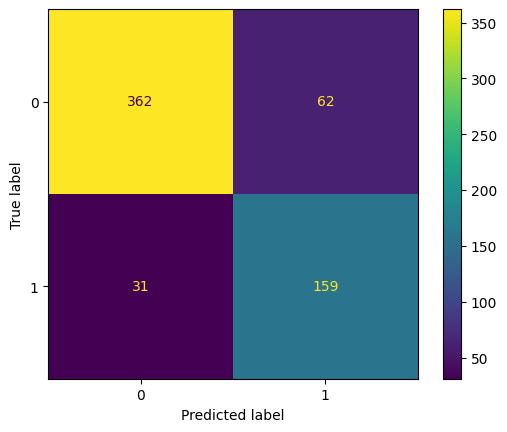

In [ ]:
# plotting confusion matrix
cmd = ConfusionMatrixDisplay(cm_lr)
cmd.plot()

In [ ]:
# predict for test data
y_pred_knn = knn_best.predict(x_test_scaled)
y_pred_knn

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
# checking accuracy, precision, f1, recall
ac_knn=accuracy_score(y_pred_knn,y_test)
re_knn=recall_score(y_pred_knn,y_test)
pr_knn=precision_score(y_pred_knn,y_test)
f1_knn=f1_score(y_pred_knn,y_test)

print("Accuracy : ",ac_knn)
print("Recall Score : ",re_knn)
print("Precision Score : ",pr_knn)
print("F1 Score : ",f1_knn)

Accuracy :  0.8701298701298701
Recall Score :  0.8
Precision Score :  0.7659574468085106
F1 Score :  0.782608695652174


In [ ]:
# confusion matrix
cm_lr = confusion_matrix(y_pred_knn,y_test)
cm_lr

array([[98, 11],
       [ 9, 36]])

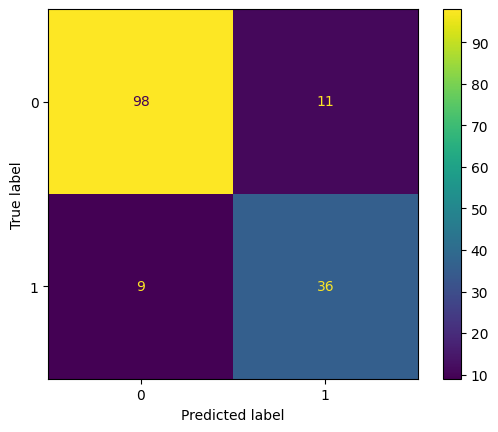

In [ ]:
# plotting confusion matrix
cmd = ConfusionMatrixDisplay(cm_lr)
cmd.plot()

## SVM

In [ ]:
# training with SVM model
svc=SVC(kernel='rbf',C=1000,gamma=0.01)
svc.fit(x_train_scaled,y_train)

SVC(C=1000, gamma=0.01)

In [ ]:
# predicting with training values
y_pred_svc=svc.predict(x_train_scaled)
y_pred_svc

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# checking accuracy, precision, f1 score, recall
ac_svc=accuracy_score(y_pred_svc,y_train)
re_svc=recall_score(y_pred_svc,y_train)
pr_svc=precision_score(y_pred_svc,y_train)
f1_svc=f1_score(y_pred_svc,y_train)

print("Accuracy : ",ac_svc)
print("Recall Score : ",re_svc)
print("Precision Score : ",pr_svc)
print("F1 Score : ",f1_svc)

Accuracy :  0.9087947882736156
Recall Score :  0.8947368421052632
Precision Score :  0.8461538461538461
F1 Score :  0.8697674418604651


In [ ]:
# confusion matrix
cm_lr = confusion_matrix(y_pred_svc,y_train)
cm_lr

array([[371,  34],
       [ 22, 187]])

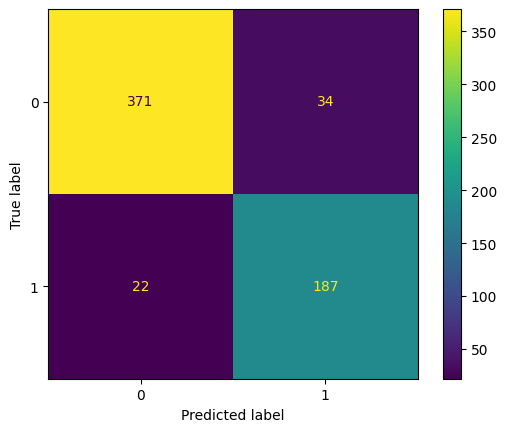

In [ ]:
# plotting confusion matrix
cmd = ConfusionMatrixDisplay(cm_lr)
cmd.plot()

In [ ]:
# predicting with testing data
y_pred_svc=svc.predict(x_test_scaled)
y_pred_svc

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# checking accuracy, precision, f1 score, recall
ac_svc=accuracy_score(y_pred_svc,y_test)
re_svc=recall_score(y_pred_svc,y_test)
pr_svc=precision_score(y_pred_svc,y_test)
f1_svc=f1_score(y_pred_svc,y_test)

print("Accuracy : ",ac_svc)
print("Recall Score : ",re_svc)
print("Precision Score : ",pr_svc)
print("F1 Score : ",f1_svc)

Accuracy :  0.8376623376623377
Recall Score :  0.7291666666666666
Precision Score :  0.7446808510638298
F1 Score :  0.7368421052631579


In [ ]:
# confusion matrix
cm_lr = confusion_matrix(y_pred_svc,y_test)
cm_lr

array([[94, 12],
       [13, 35]])

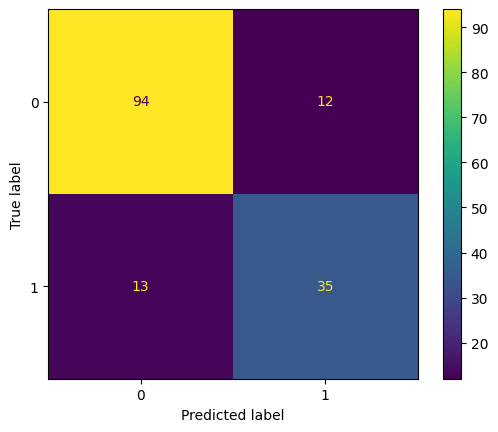

In [ ]:
# plotting confusion matrix
cmd = ConfusionMatrixDisplay(cm_lr)
cmd.plot()

In [ ]:
# classification report
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       106
           1       0.74      0.73      0.74        48

    accuracy                           0.84       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.84      0.84      0.84       154



## Random Forest

In [ ]:
# training with random forest classifier

classifier_rf = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
# predicting training dataset values
y_pred_rf = classifier_rf.predict(x_train_scaled)
y_pred_rf.shape

(614,)

In [ ]:
# checking accuracy, precision, recall, f1 score

ac_rf = accuracy_score(y_pred_rf, y_train)
re_rf = recall_score(y_pred_rf, y_train)
pr_rf = precision_score(y_pred_rf, y_train)
f1_rf = f1_score(y_pred_rf, y_train)

print("Accuracy : ", ac_rf)
print("Recall Score : ", re_rf)
print("Precision Score : ", pr_rf)
print("F1 Score : ", f1_rf)

Accuracy :  0.9283387622149837
Recall Score :  0.8933333333333333
Precision Score :  0.9095022624434389
F1 Score :  0.9013452914798207


In [ ]:
# predicting values for testing data

y_pred_rf = classifier_rf.predict(x_test_scaled)
y_pred_rf.shape

(154,)

In [ ]:
# checking accuracy, precision, recall, f1 score

ac_rf = accuracy_score(y_pred_rf, y_test)
re_rf = recall_score(y_pred_rf, y_test)
pr_rf = precision_score(y_pred_rf, y_test)
f1_rf = f1_score(y_pred_rf, y_test)

print("Accuracy : ", ac_rf)
print("Recall Score : ", re_rf)
print("Precision Score : ", pr_rf)
print("F1 Score : ", f1_rf)

Accuracy :  0.8961038961038961
Recall Score :  0.7924528301886793
Precision Score :  0.8936170212765957
F1 Score :  0.84


Hyperparameter Tuning Using GridsearchCV

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=1, verbose=1, scoring="accuracy")

grid_search.fit(x_train_scaled, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# checking best score
grid_search.best_score_

0.8680714710126475

In [ ]:
# checking best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=0)

In [ ]:
# checking importance of best estimator
rf_best.feature_importances_

array([0.0310411 , 0.17081679, 0.02210484, 0.15431583, 0.42494921,
       0.0685096 , 0.03665393, 0.09160869])

In [ ]:
# sorting the features according to importance
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,Insulin,0.424949
1,Glucose,0.170817
3,SkinThickness,0.154316
7,Age,0.091609
5,BMI,0.068510
6,DiabetesPedigreeFunction,0.036654
0,Pregnancies,0.031041
2,BloodPressure,0.022105


[Text(0.5416666666666666, 0.9166666666666666, 'Insulin <= -0.378\ngini = 0.455\nsamples = 388\nvalue = [399, 215]\nclass = No Diabetes'),
 Text(0.3125, 0.75, 'Insulin <= -0.498\ngini = 0.082\nsamples = 197\nvalue = [290, 13]\nclass = No Diabetes'),
 Text(0.4270833333333333, 0.8333333333333333, 'True  '),
 Text(0.2708333333333333, 0.5833333333333334, 'Age <= -0.591\ngini = 0.213\nsamples = 68\nvalue = [94, 13]\nclass = No Diabetes'),
 Text(0.16666666666666666, 0.4166666666666667, 'BMI <= -0.244\ngini = 0.101\nsamples = 47\nvalue = [71, 4]\nclass = No Diabetes'),
 Text(0.08333333333333333, 0.25, 'Glucose <= -0.733\ngini = 0.042\nsamples = 28\nvalue = [46, 1]\nclass = No Diabetes'),
 Text(0.041666666666666664, 0.08333333333333333, 'gini = 0.0\nsamples = 22\nvalue = [39, 0]\nclass = No Diabetes'),
 Text(0.125, 0.08333333333333333, 'gini = 0.219\nsamples = 6\nvalue = [7, 1]\nclass = No Diabetes'),
 Text(0.25, 0.25, 'BMI <= 0.178\ngini = 0.191\nsamples = 19\nvalue = [25, 3]\nclass = No Diabe

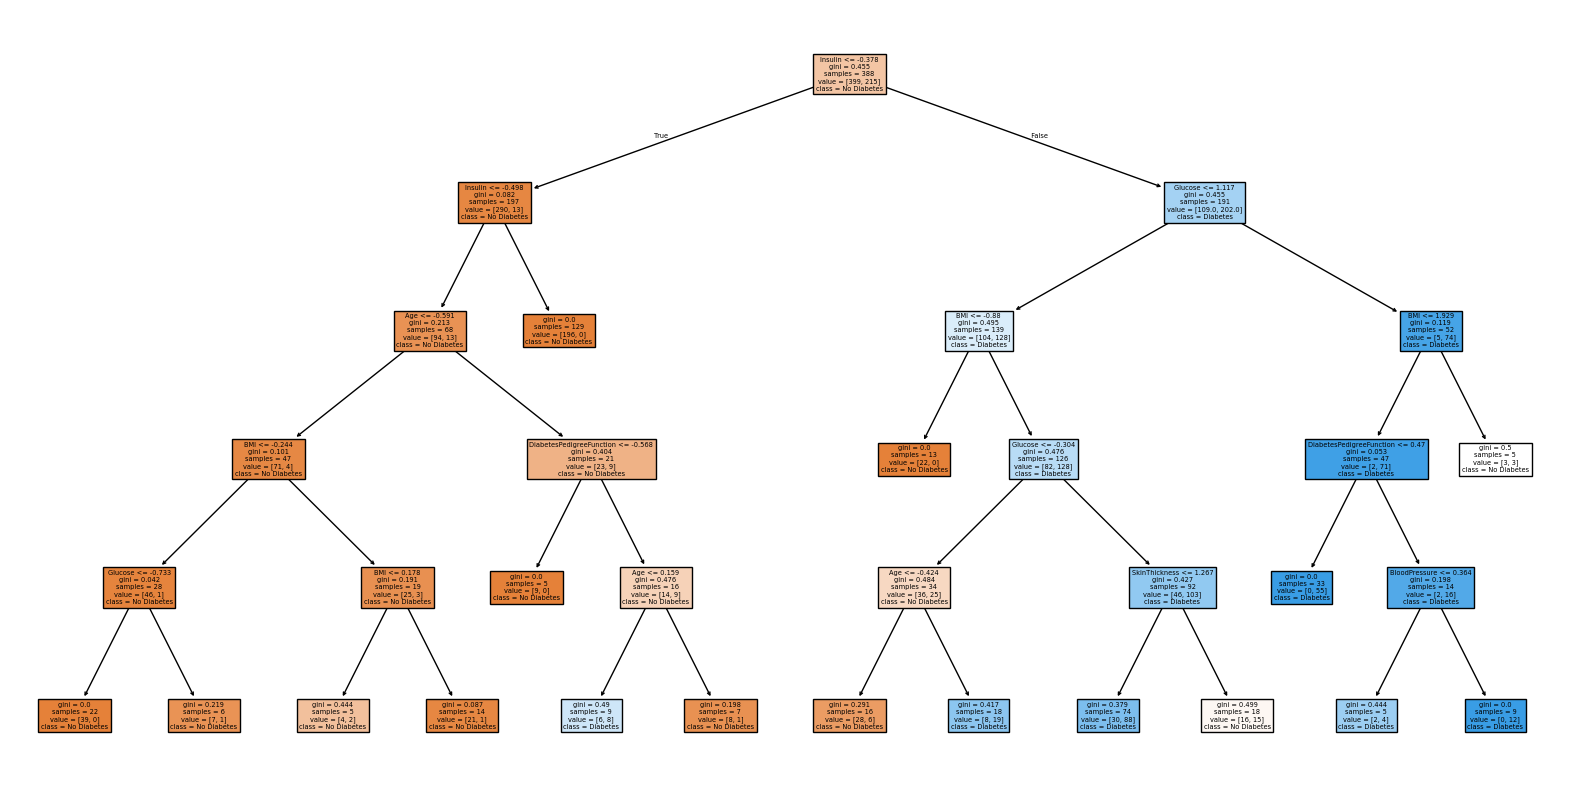

In [ ]:
# plotting best estimator decision tree with class names "Diabetes" & "No Diabetes"
plt.figure(figsize=(20,10))
plot_tree(rf_best.estimators_[0], feature_names=x_train.columns, class_names=["No Diabetes", "Diabetes"], filled=True)

In [ ]:
# predicting on training data
y_pred_rf = grid_search.predict(x_train_scaled)
y_pred_rf.shape

(614,)

In [ ]:
# checking accuracy, precision, recall, f1 score

ac_rf_best = accuracy_score(y_pred_rf, y_train)
re_rf_best = recall_score(y_pred_rf, y_train)
pr_rf_best = precision_score(y_pred_rf, y_train)
f1_rf_best = f1_score(y_pred_rf, y_train)

print("Accuracy : ", ac_rf_best)
print("Recall Score : ", re_rf_best)
print("Precision Score : ", pr_rf_best)
print("F1 Score : ", f1_rf_best)

Accuracy :  0.9234527687296417
Recall Score :  0.8954545454545455
Precision Score :  0.8914027149321267
F1 Score :  0.8934240362811792


In [ ]:
# predicting on test data
y_pred_rf = grid_search.predict(x_test_scaled)
y_pred_rf.shape

(154,)

In [ ]:
# checking accuracy, precision, recall, f1 score

ac_rf_best = accuracy_score(y_pred_rf, y_test)
re_rf_best = recall_score(y_pred_rf, y_test)
pr_rf_best = precision_score(y_pred_rf, y_test)
f1_rf_best = f1_score(y_pred_rf, y_test)

print("Accuracy : ", ac_rf_best)
print("Recall Score : ", re_rf_best)
print("Precision Score : ", pr_rf_best)
print("F1 Score : ", f1_rf_best)

Accuracy :  0.9090909090909091
Recall Score :  0.8113207547169812
Precision Score :  0.9148936170212766
F1 Score :  0.86


Training Data on Best Estimator

In [ ]:
# training with random forest classifier

classifier_rf = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=5,
                                       n_estimators=200, min_samples_leaf = 5)

classifier_rf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=0)

In [ ]:
# predicting training dataset values
y_pred_rf = classifier_rf.predict(x_train_scaled)
y_pred_rf.shape

(614,)

In [ ]:
# checking accuracy, precision, recall, f1 score

ac_rf = accuracy_score(y_pred_rf, y_train)
re_rf = recall_score(y_pred_rf, y_train)
pr_rf = precision_score(y_pred_rf, y_train)
f1_rf = f1_score(y_pred_rf, y_train)

print("Accuracy : ", ac_rf)
print("Recall Score : ", re_rf)
print("Precision Score : ", pr_rf)
print("F1 Score : ", f1_rf)

Accuracy :  0.9234527687296417
Recall Score :  0.8954545454545455
Precision Score :  0.8914027149321267
F1 Score :  0.8934240362811792


In [ ]:
x_test_scaled

array([[-0.8354355 ,  2.55382415,  0.28071703, ...,  1.47185615,
         2.78594417, -0.96569189],
       [-0.54480808, -0.48566889,  0.1142256 , ...,  0.14216276,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.50984589, -0.88472301, ...,  0.19935388,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.67065998,  1.1131742 , ...,  1.62913171,
         0.53623395, -0.96569189],
       [-0.25418066, -0.18832718,  0.1142256 , ..., -0.90157505,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.48566889, -0.05226584, ..., -0.25817503,
         1.06487079, -0.79911377]])

In [ ]:
# predicting values for testing data

y_pred_rf = classifier_rf.predict(x_test_scaled)
y_pred_rf

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
# checking accuracy, precision, recall, f1 score

ac_rf = accuracy_score(y_pred_rf, y_test)
re_rf = recall_score(y_pred_rf, y_test)
pr_rf = precision_score(y_pred_rf, y_test)
f1_rf = f1_score(y_pred_rf, y_test)

print("Accuracy : ", ac_rf)
print("Recall Score : ", re_rf)
print("Precision Score : ", pr_rf)
print("F1 Score : ", f1_rf)

Accuracy :  0.9090909090909091
Recall Score :  0.8113207547169812
Precision Score :  0.9148936170212766
F1 Score :  0.86


In [ ]:
# finding those unscaled values for  which model predicted 0
x_test[y_pred_rf == 0].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
122,2,107.0,74.0,30.0,100.0,33.6,0.404,23
113,4,76.0,62.0,27.0,102.5,34.0,0.391,25
529,0,111.0,65.0,27.0,102.5,24.6,0.660,31
103,1,81.0,72.0,18.0,40.0,26.6,0.283,24
395,2,127.0,58.0,24.0,275.0,27.7,1.600,25


In [ ]:
x_test[y_pred_rf == 1].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199.0,76.0,43.0,169.5,42.9,1.394,22
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
338,9,152.0,78.0,34.0,171.0,34.2,0.893,33
588,3,176.0,86.0,27.0,156.0,33.3,1.154,52
204,6,103.0,72.0,32.0,190.0,37.7,0.324,55


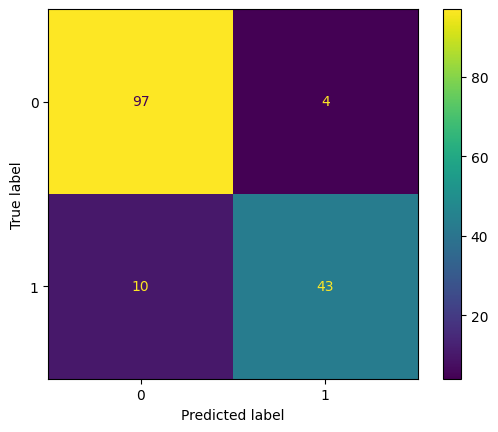

In [ ]:
# plot confusion matrix for test data
cm_rf = confusion_matrix(y_pred_rf, y_test)
cmd = ConfusionMatrixDisplay(cm_rf)
cmd.plot()

## XGBoost

In [ ]:
# training with XGBoost classifier

xgb = XGBClassifier(random_state=0)
xgb.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# predicting with training data
y_pred_xgb = xgb.predict(x_train_scaled)
y_pred_xgb.shape

(614,)

In [ ]:
# checking accuracy, precision, recall, f1 score
ac_xgb = accuracy_score(y_pred_xgb, y_train)
re_xgb = recall_score(y_pred_xgb, y_train)
pr_xgb = precision_score(y_pred_xgb, y_train)
f1_xgb = f1_score(y_pred_xgb, y_train)

print("Accuracy : ", ac_xgb)
print("Recall Score : ", re_xgb)
print("Precision Score : ", pr_xgb)
print("F1 Score : ", f1_xgb)

Accuracy :  1.0
Recall Score :  1.0
Precision Score :  1.0
F1 Score :  1.0


In [ ]:
# predicting for test data
y_pred_xgb = xgb.predict(x_test_scaled)
y_pred_xgb.shape

(154,)

In [ ]:
# checking accuracy, precision, recall, f1 score
ac_xgb = accuracy_score(y_pred_xgb, y_test)
re_xgb = recall_score(y_pred_xgb, y_test)
pr_xgb = precision_score(y_pred_xgb, y_test)
f1_xgb = f1_score(y_pred_xgb, y_test)

print("Accuracy : ", ac_xgb)
print("Recall Score : ", re_xgb)
print("Precision Score : ", pr_xgb)
print("F1 Score : ", f1_xgb)

Accuracy :  0.9025974025974026
Recall Score :  0.7962962962962963
Precision Score :  0.9148936170212766
F1 Score :  0.8514851485148515


In [ ]:
# finding all those input for those model has predicted 0, 1

x_test[y_pred_xgb == 0].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
122,2,107.0,74.0,30.0,100.0,33.6,0.404,23
113,4,76.0,62.0,27.0,102.5,34.0,0.391,25
529,0,111.0,65.0,27.0,102.5,24.6,0.660,31
103,1,81.0,72.0,18.0,40.0,26.6,0.283,24
204,6,103.0,72.0,32.0,190.0,37.7,0.324,55


In [ ]:
x_test[y_pred_xgb == 1].head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199.0,76.0,43.0,169.5,42.9,1.394,22
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
338,9,152.0,78.0,34.0,171.0,34.2,0.893,33
588,3,176.0,86.0,27.0,156.0,33.3,1.154,52
395,2,127.0,58.0,24.0,275.0,27.7,1.600,25


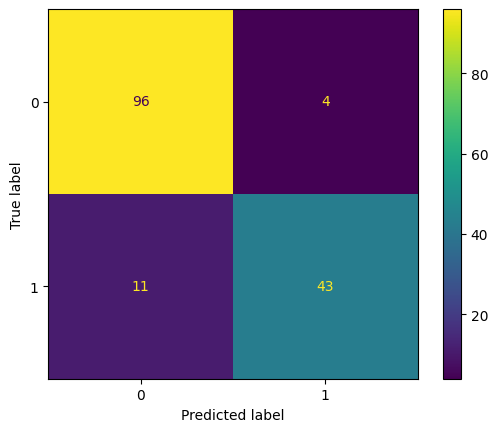

In [ ]:
# plot confusion matrix
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
cmd = ConfusionMatrixDisplay(cm_xgb)
cmd.plot()

## Making a predictive system

In [ ]:
# predictive system
classifier = classifier_rf    # to be updated with best performing model
scaler = pickle.load(open('scaler.pkl', 'rb'))
input = [[0,80,70,22,70.5,22,0.120,23]]
input = np.array(input)
input = scaler.transform(input)
print(input)
output = classifier.predict(input)

if output == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[[-1.12606292 -1.37769402 -0.21875727 -0.80361384 -0.80018147 -1.51637952
  -1.04066574 -0.88240283]]
The person is not diabetic


## Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

In [ ]:
# predicting through loaded model

input = [[3,176,86,27,156,33.3,1.154,52]]
input = np.array(input)
input = scaler.transform(input)
print(input)
output = loaded_model.predict(input)

if output == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[[-0.25418066  1.79395089  1.1131742  -0.2440551   0.1378126   0.09926943
   2.06507574  1.53297992]]
The person is diabetic


In [ ]:
# predicting x_test on this model
input = np.array(x_test)
input = scaler.transform(input)
print(input)
output = loaded_model.predict(input)
print(output)

[[-0.8354355   2.55382415  0.28071703 ...  1.47185615  2.78594417
  -0.96569189]
 [-0.54480808 -0.48566889  0.1142256  ...  0.14216276 -0.1876381
  -0.88240283]
 [ 0.03644676 -1.50984589 -0.88472301 ...  0.19935388 -0.22668514
  -0.71582471]
 ...
 [ 0.03644676  0.67065998  1.1131742  ...  1.62913171  0.53623395
  -0.96569189]
 [-0.25418066 -0.18832718  0.1142256  ... -0.90157505 -1.07971278
  -0.79911377]
 [-0.8354355  -0.48566889 -0.05226584 ... -0.25817503  1.06487079
  -0.79911377]]
[1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 0]


In [ ]:
# checking accuracy score, f1 score, recall_score, precision score
accuracy = accuracy_score(output, y_test)
f1 = f1_score(output, y_test)
recall = recall_score(output, y_test)
precision = precision_score(output, y_test)
print("Accuracy : ", accuracy)
print("F1 Score : ", f1)
print("Recall Score : ", recall)
print("Precision Score : ", precision)

Accuracy :  0.9090909090909091
F1 Score :  0.86
Recall Score :  0.8113207547169812
Precision Score :  0.9148936170212766
